## Import required Modules and load Data File

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

ls = pd.read_csv('Dis2.csv')

In [2]:
inputs = ls.drop(['PROFILE', 'PLAN', 'CHANGE', 'DRAINAGE', 'FAULTLINES', 'ROAD', 'GEOLOGY'],axis='columns')
inputs.head()

,Y,LANDUSE,ELEVATION,SLOPE,ASPECT,TWI,SPI,NDVI,RAINFALL
0,1,10,11,22,7,45,24,16,29
1,1,10,26,31,11,30,23,22,29
2,1,10,26,31,11,45,30,36,29
3,1,10,26,6,7,16,23,22,29
4,1,10,26,31,15,45,30,36,29


## Correlation Heatmap

<IPython.core.display.Javascript object>


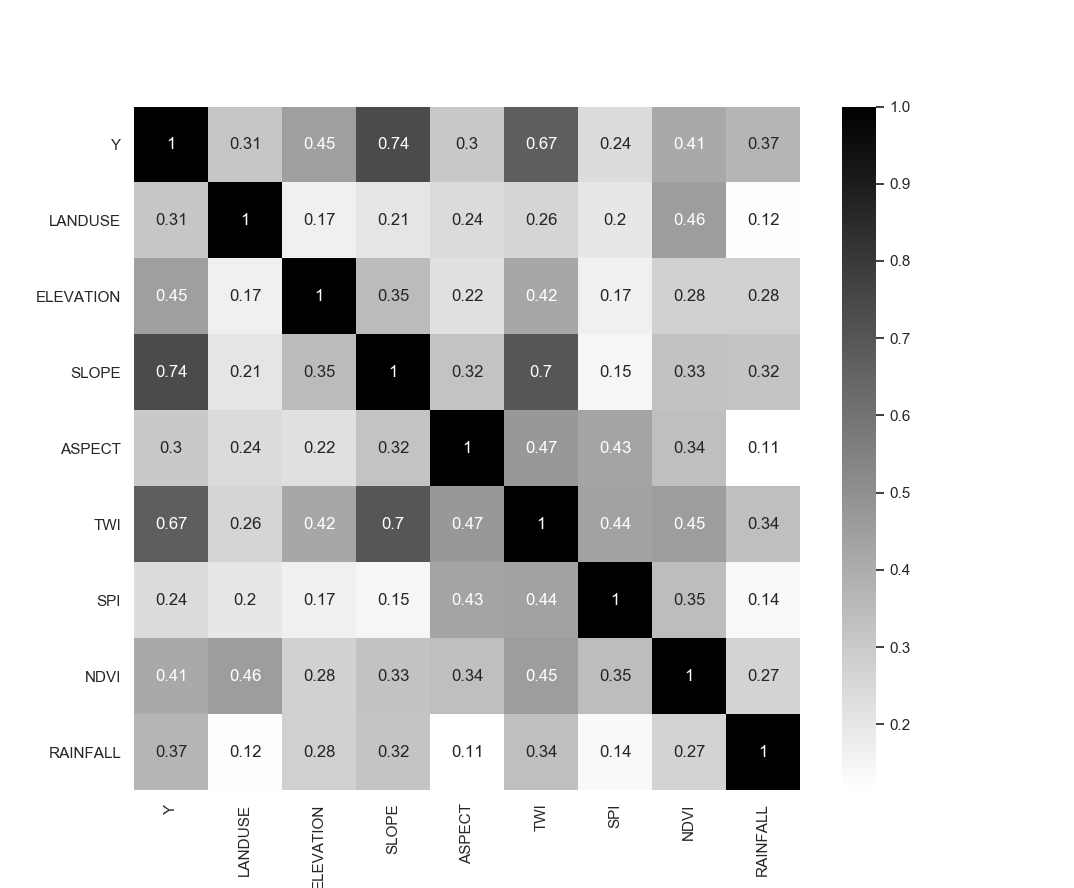

In [31]:
sns.heatmap(inputs.corr(), annot=True, cmap="gist_gray_r")

## Create train-test split

In [4]:
X = ls[['ELEVATION', 'SLOPE','ASPECT','TWI','SPI','NDVI','RAINFALL','LANDUSE']]
y = ls['Y']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


## Confustion Matrix Function

In [5]:
def make_confusion_matrix(matrix):
    cf_matrix = matrix
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Create Classifier Object

### K Nearest Neighbours

Accuracy of KNN Classifier on test set: 0.87
(0.8779761904761905, 0.8708802670004172, 0.8670007307652157, None)


<IPython.core.display.Javascript object>


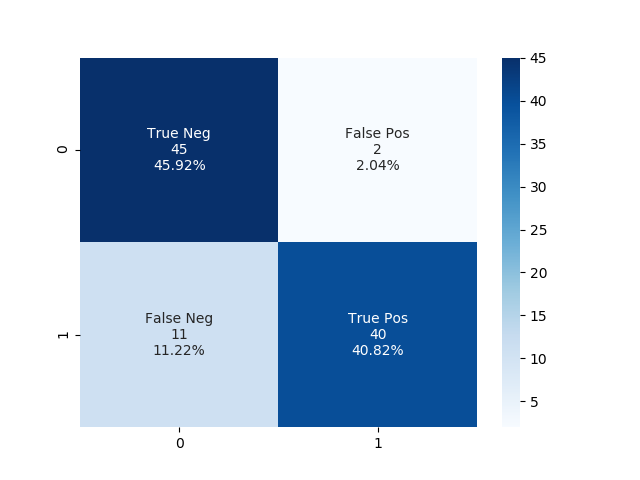

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_met = precision_recall_fscore_support(y_test,knn_pred, average='macro')

print("Accuracy of KNN Classifier on test set: {:.2f}"
      .format(knn.score(X_test, y_test)))

knn_acc = knn.score(X_test, y_test)

print(knn_met)

knn_matrix = confusion_matrix(y_test,knn_pred)

knn_fn = knn_matrix[1][0]

make_confusion_matrix(knn_matrix)

### Decision Trees

Accuracy of Decision Tree classifier on test set: 0.87
(0.8674749163879598, 0.8667083854818523, 0.8670007307652157, None)


<IPython.core.display.Javascript object>


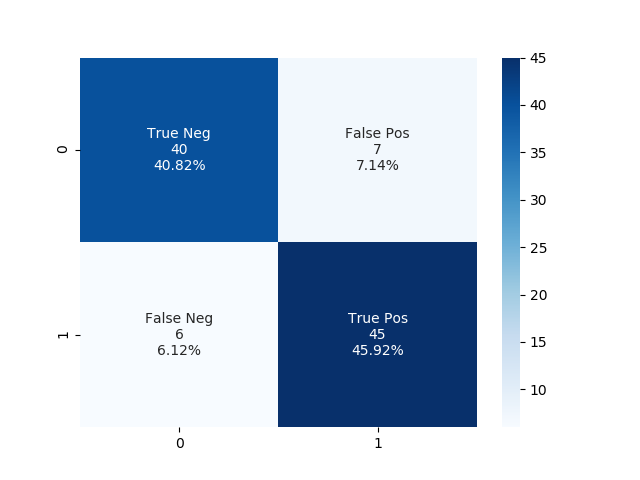

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_met = precision_recall_fscore_support(y_test,dt_pred, average='macro')

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

dt_acc = dt.score(X_test, y_test)

print(dt_met)

dt_matrix = confusion_matrix(y_test,dt_pred)

dt_fn = dt_matrix[1][0]

make_confusion_matrix(dt_matrix)

### Support Vector Machine

Accuracy of Kernalized Support Vector Machine Classifier on test set: 0.68
(0.8109756097560976, 0.6702127659574468, 0.6374269005847952, None)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


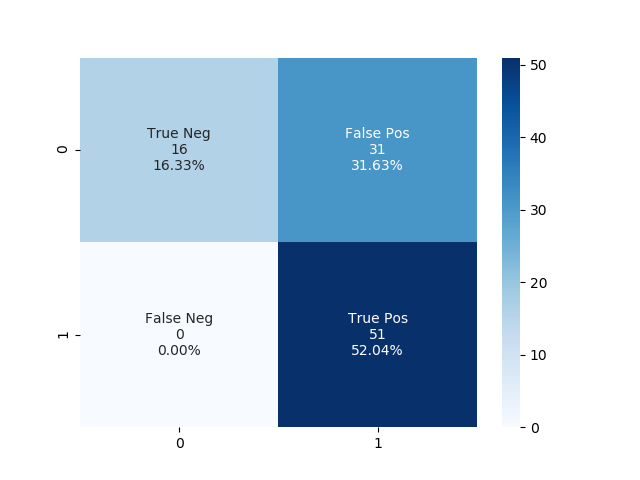

In [8]:
from sklearn.svm import SVC

# The default SVC kernel is radial basis function (RBF)
svm= SVC().fit(X_train, y_train)

svm_pred = svm.predict(X_test)

svm_met = precision_recall_fscore_support(y_test,svm_pred, average='macro')

print('Accuracy of Kernalized Support Vector Machine Classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

svm_acc = svm.score(X_test, y_test)

print(svm_met)

svm_matrix = confusion_matrix(y_test,svm_pred)

svm_fn = svm_matrix[1][0]

make_confusion_matrix(svm_matrix)

### Linear Regression

Accuracy of Linear Regression on test set: 0.64
(0.8175675675675675, 0.7352941176470589, 0.7084297520661156, None)


<IPython.core.display.Javascript object>


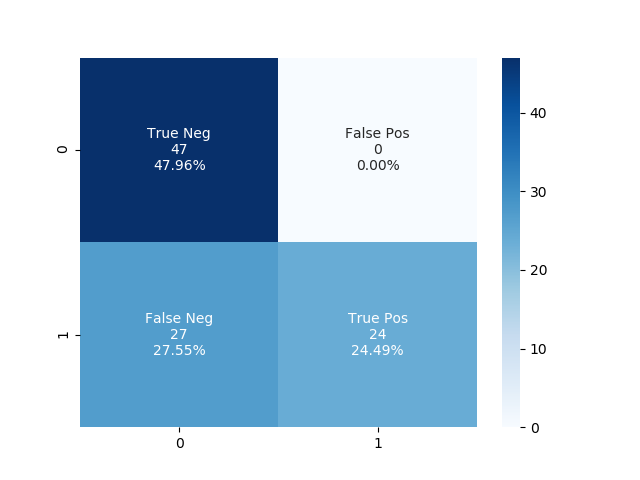

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

linreg_pred = linreg.predict(X_test)

linreg_pred = [ int(x) for x in linreg_pred]

linreg_met = precision_recall_fscore_support(y_test,linreg_pred, average='macro')

print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))

linreg_acc = linreg.score(X_test, y_test)

print(linreg_met)

linreg_matrix = confusion_matrix(y_test,linreg_pred)

linreg_fn = linreg_matrix[1][0]

make_confusion_matrix(linreg_matrix)

### Random Forest

Accuracy of Random Forest on test set: 0.88
(0.8790154359616187, 0.8790154359616187, 0.8775510204081632, None)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<IPython.core.display.Javascript object>


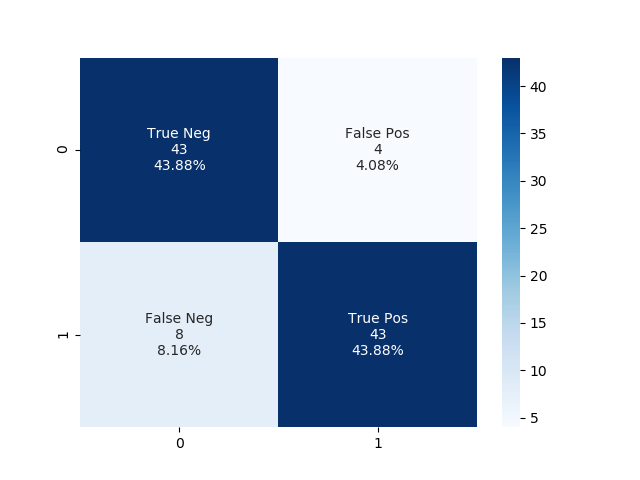

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=0)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_met = precision_recall_fscore_support(y_test,rf_pred, average='macro')

print('Accuracy of Random Forest on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

rf_acc = rf.score(X_test, y_test)

print(rf_met)

rf_matrix = confusion_matrix(y_test,rf_pred)

rf_fn = rf_matrix[1][0]

make_confusion_matrix(rf_matrix)

### Bayesian Regression

Accuracy of Bayesian Regression on test set: 0.64
(0.8092105263157895, 0.7156862745098039, 0.6834836841519101, None)


<IPython.core.display.Javascript object>


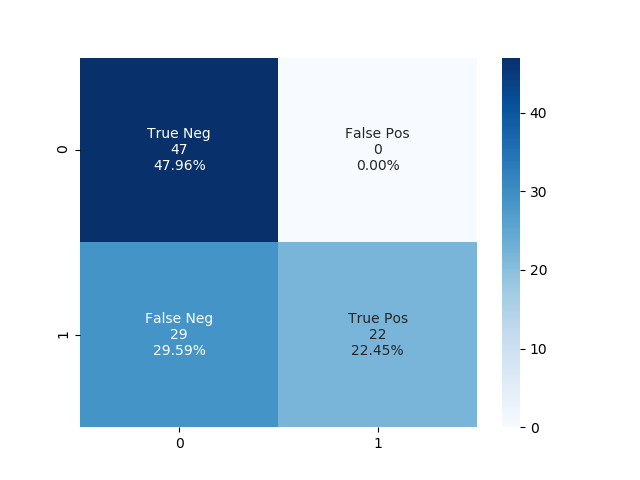

In [11]:
from sklearn import linear_model

br = linear_model.BayesianRidge()

br.fit(X_train, y_train)

br_pred = br.predict(X_test)

br_pred = [ int(x) for x in br_pred]

br_met = precision_recall_fscore_support(y_test,br_pred, average='macro')

print('Accuracy of Bayesian Regression on test set: {:.2f}'
     .format(br.score(X_test, y_test)))

br_acc = br.score(X_test, y_test)

print(br_met)

br_matrix = confusion_matrix(y_test,br_pred)

br_fn = br_matrix[1][0]

make_confusion_matrix(br_matrix)

### AdaBoost

Accuracy of AdaBoost Classifier on test set: 0.84
(0.838130997079683, 0.838130997079683, 0.8367346938775511, None)


<IPython.core.display.Javascript object>


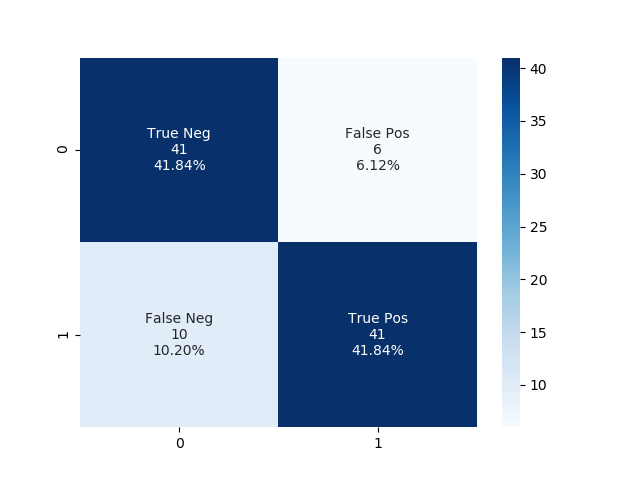

In [12]:
from sklearn.ensemble import AdaBoostClassifier

aBoost = AdaBoostClassifier(n_estimators=100)

aBoost.fit(X_train, y_train)

aBoost_pred = aBoost.predict(X_test)

aBoost_met = precision_recall_fscore_support(y_test,aBoost_pred, average='macro')

print('Accuracy of AdaBoost Classifier on test set: {:.2f}'
     .format(aBoost.score(X_test, y_test)))

aBoost_acc = aBoost.score(X_test, y_test)

print(aBoost_met)

aBoost_matrix = confusion_matrix(y_test,aBoost_pred)

aBoost_fn = aBoost_matrix[1][0]

make_confusion_matrix(aBoost_matrix)

### Gradient Tree Boosting

Accuracy of Gradient Tree Boosting Classifier on test set: 0.85
(0.8494983277591973, 0.8487692949520234, 0.8469228366135583, None)


<IPython.core.display.Javascript object>


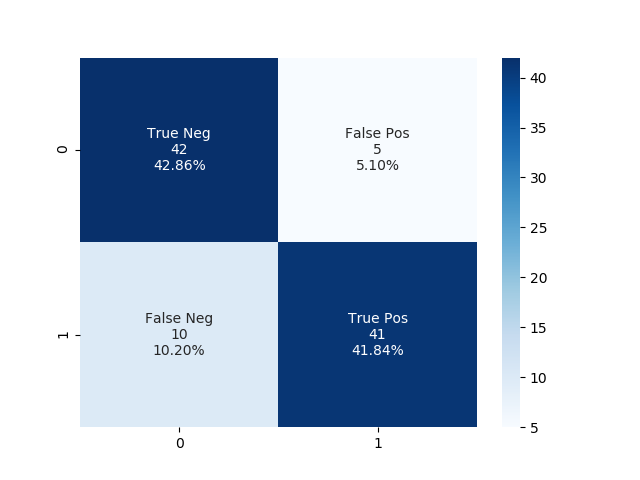

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

gtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

gtb_pred = gtb.predict(X_test)

gtb_met = precision_recall_fscore_support(y_test,gtb_pred, average='macro')

print('Accuracy of Gradient Tree Boosting Classifier on test set: {:.2f}'
     .format(gtb.score(X_test, y_test)))

gtb_acc = gtb.score(X_test, y_test)

print(gtb_met)

gtb_matrix = confusion_matrix(y_test,gtb_pred)

gtb_fn = gtb_matrix[1][0]

make_confusion_matrix(gtb_matrix)

### Neural Network

Accuracy of Neural Network Classifier on test set: 0.48
(0.23979591836734693, 0.5, 0.32413793103448274, None)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<IPython.core.display.Javascript object>


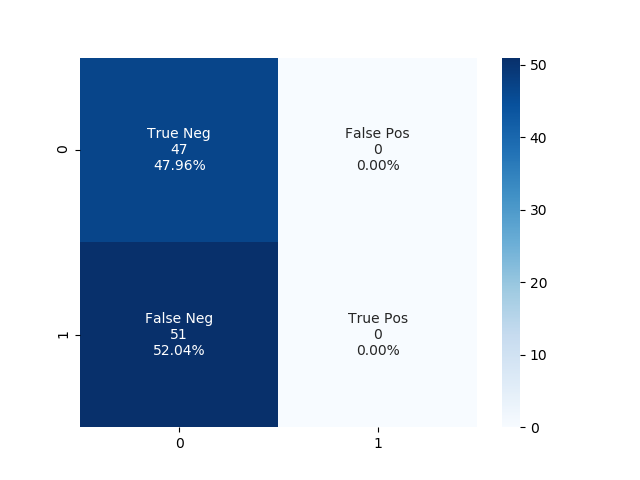

In [14]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

nn.fit(X_train, y_train)

nn_pred = nn.predict(X_test)

nn_met = precision_recall_fscore_support(y_test,nn_pred, average='macro')

print('Accuracy of Neural Network Classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

nn_acc = nn.score(X_test, y_test)

print(nn_met)

nn_matrix = confusion_matrix(y_test,nn_pred)

nn_fn = nn_matrix[1][0]

make_confusion_matrix(nn_matrix)

## Accuracy Histogram

<IPython.core.display.Javascript object>


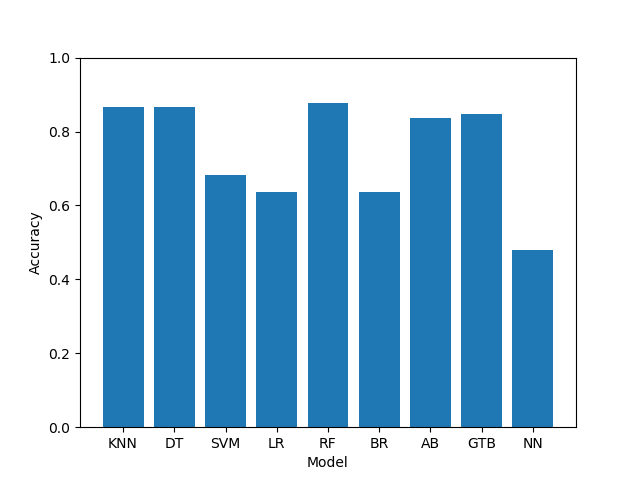

In [15]:
acc = [knn_acc, dt_acc, svm_acc, linreg_acc, rf_acc, br_acc, aBoost_acc, gtb_acc, nn_acc]
x = np.arange(9)
plt.ylim(0,1)
plt.bar(x,acc)
plt.xticks(x,['KNN','DT','SVM','LR', 'RF','BR','AB','GTB','NN'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

## False Negative Histogram

<IPython.core.display.Javascript object>


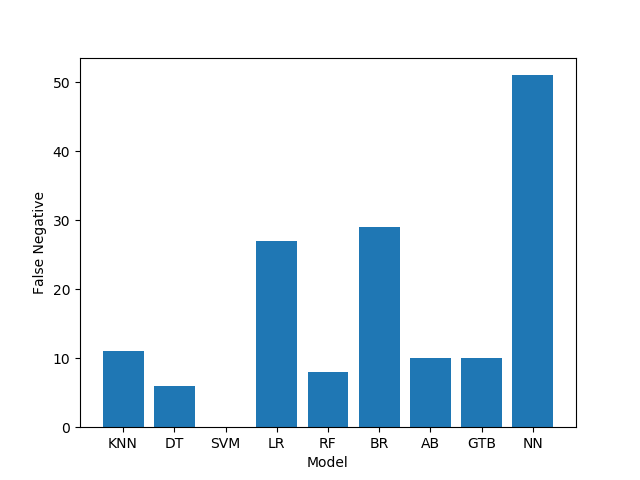

In [16]:
fn = [knn_fn, dt_fn, svm_fn, linreg_fn, rf_fn, br_fn, aBoost_fn, gtb_fn, nn_fn]
x = np.arange(9)
#plt.ylim(0,1)
plt.bar(x,fn)
plt.xticks(x,['KNN','DT','SVM','LR', 'RF','BR','AB','GTB','NN'])
plt.xlabel('Model')
plt.ylabel('False Negative')
plt.show()

## Trade Off Score Histogram

[0.8673469387755102, 0.8673469387755102, 0.6836734693877551, 0.6368075256487492, 0.8775510204081632, 0.6365803318192762, 0.8367346938775511, 0.8469387755102041, 0.47959183673469385]
0.7480635034374904
0.13494546011041675
[ 0.70838672  0.70838672 -0.44396305 -0.67748543  0.74407806 -0.67839524
  0.57642296  0.62471772 -0.96327695]
[11, 6, 0, 27, 8, 29, 10, 10, 51]
16.88888888888889
14.999588471721072
[-0.37360239 -0.62057879 -0.80963095  0.58766552 -0.53176933  0.66816984
 -0.42949057 -0.42949057  0.97905082]
[ 0.54099456  0.66448276  0.18283395 -0.63257548  0.6379237  -0.67328254
  0.50295676  0.52710414 -0.97116388]


<IPython.core.display.Javascript object>


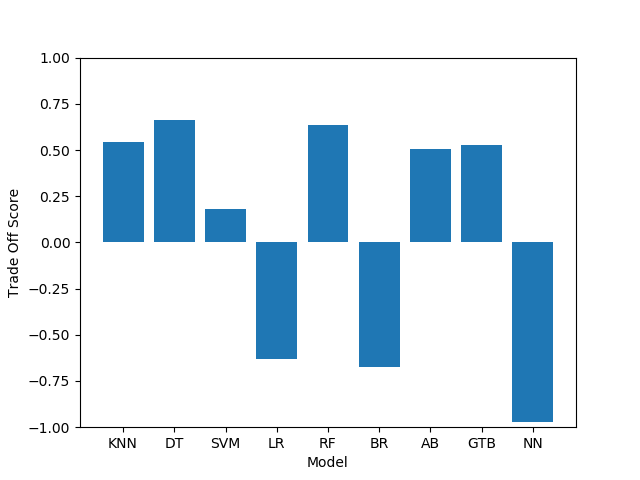

In [17]:
avg_acc = sum(acc)/len(acc)
std_acc = np.std(acc)
z_acc =  np.tanh((acc-avg_acc)/std_acc)
avg_fn = sum(fn)/len(fn)
std_fn = np.std(fn)
z_fn = np.tanh((fn-avg_fn)/std_fn)
TOS = 0.5*(z_acc - z_fn)

print(acc)
print(avg_acc)
print(std_acc)
print(z_acc)
print(fn)
print(avg_fn)
print(std_fn)
print(z_fn)
print(TOS)


x = np.arange(9)
plt.ylim(-1,1)
plt.bar(x,TOS)
plt.xticks(x,['KNN','DT','SVM','LR','RF','BR','AB','GTB','NN'])
plt.xlabel('Model')
plt.ylabel('Trade Off Score')
plt.show()


<IPython.core.display.Javascript object>


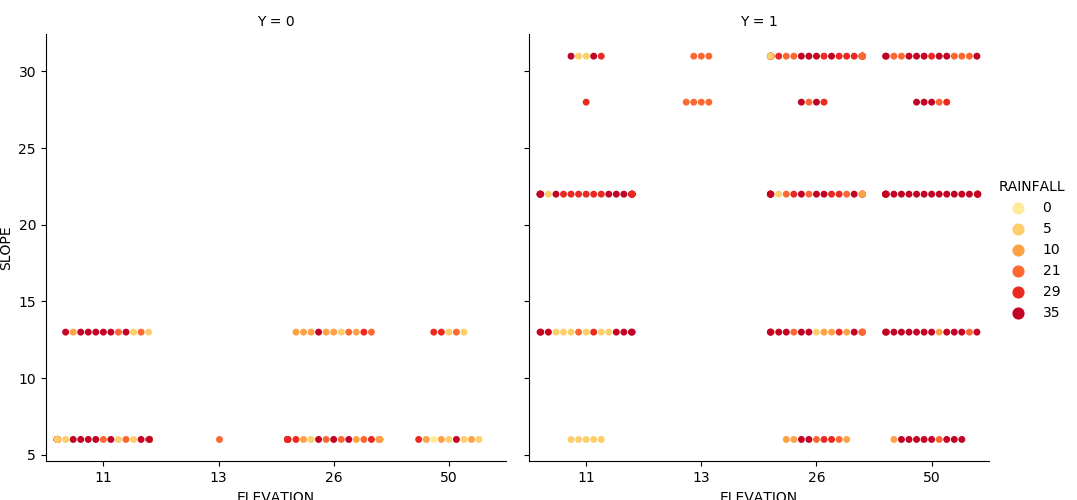

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points

In [18]:
sns.catplot(x="ELEVATION", y="SLOPE", hue="RAINFALL",
            col="Y",
            kind="swarm", data=inputs, palette="YlOrRd")

<IPython.core.display.Javascript object>


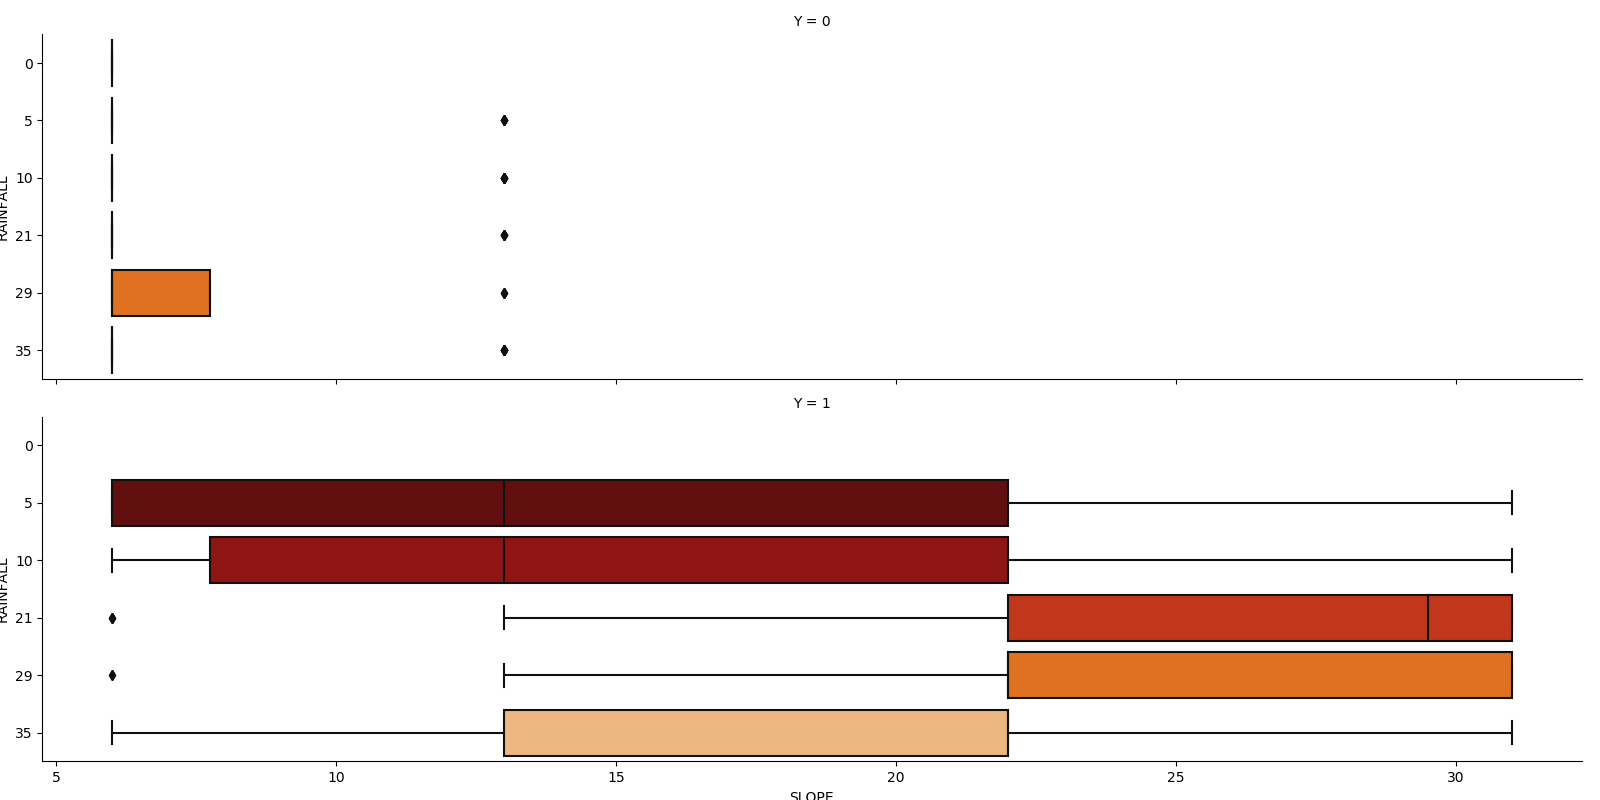

In [19]:
sns.catplot(x="SLOPE", y="RAINFALL", row="Y",
                kind="box", orient="h", height=4, aspect=4,
                data=ls.query("SLOPE > 0"),palette = "gist_heat")

<IPython.core.display.Javascript object>


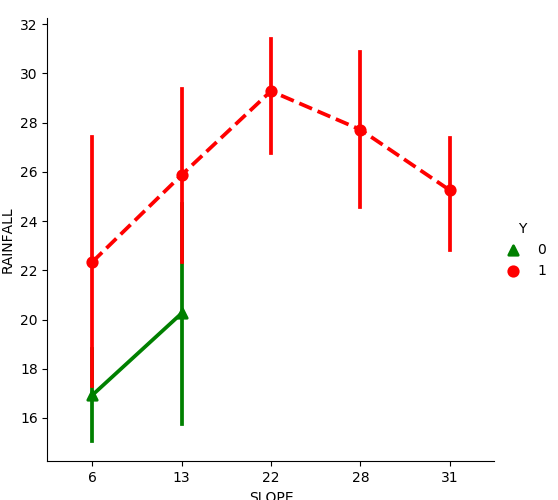

In [20]:
sns.catplot(x="SLOPE", y="RAINFALL", hue="Y",
            palette={0: "g", 1: "r"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=inputs)

<IPython.core.display.Javascript object>


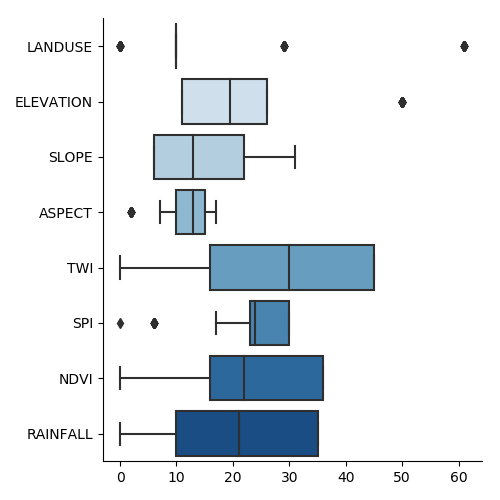

In [21]:
input1 = inputs.drop(["Y"],axis= "columns")
sns.catplot(data= input1, orient="h", kind="box",palette="Blues")

<IPython.core.display.Javascript object>


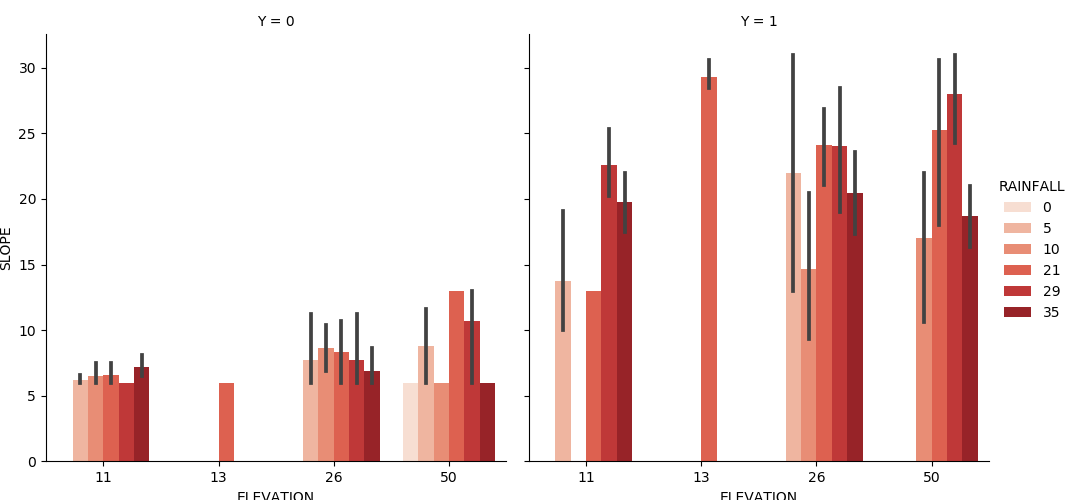

In [22]:
sns.catplot(x="ELEVATION", y="SLOPE",col="Y", kind="bar",hue="RAINFALL", data=inputs, palette = "Reds")

<IPython.core.display.Javascript object>


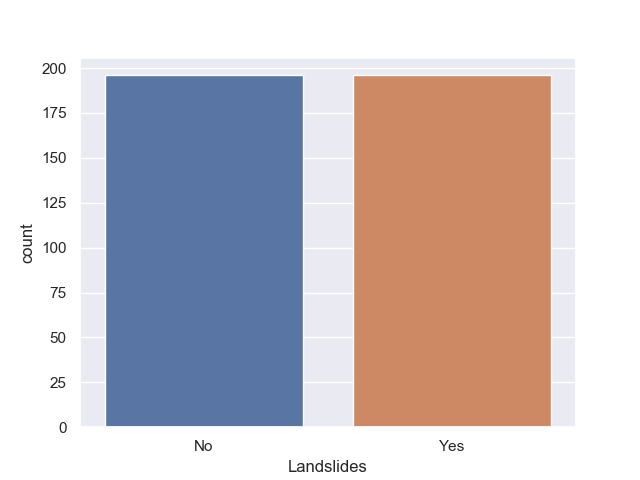

Text(0.5, 0, 'Landslides')

In [30]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Y", data=inputs)
ax.set(xticklabels= ['No','Yes'])
plt.xlabel("Landslides")